Importing All the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cv2

Reading Image and Converting it to GrayScale then ploting using matplotlib

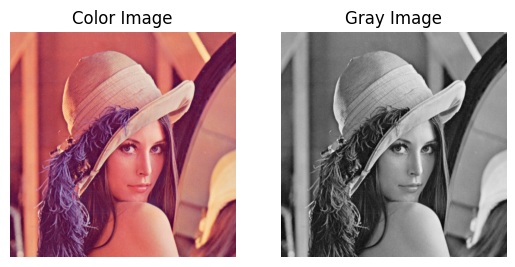

In [4]:
image_color = cv2.imread('Lena.jpg');
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Gray Image",image_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)) 
plt.title('Color Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()

Defining two kernels and convolve function

In [6]:
kernel = np.array(
    [[0, -1, 0],
     [-1, 4, -1],
     [0, -1, 0]]
)
gaussian_kernel = np.array([
    [0,  1,  2,  1, 0],
    [1, 3, 5, 3, 1],
    [2, 5, 9, 5, 2],
    [1, 3, 5, 3, 1],
    [0, 1, 2, 1, 0]
], dtype=np.float32)
def convolve(image : np.array ,  kernel : np.array) -> np.array:
    kernel = np.flip(kernel)
    ih, iw = image.shape
    kh , kw = kernel.shape
    border_size = kh//2
    img_bordered = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT)
    bh,bw = img_bordered.shape
    result = np.zeros((ih, iw), dtype=np.float32)
    for i in range(ih):
        for j in range(iw):
            region = img_bordered[i:i+kh ,j:j+kw]
            mul = np.multiply(region,kernel)
            val = np.sum(mul)
            result[i,j] = val 
            # rh , rw = region.shape 
            # sum = 0 
            # for k in range(rh):
            #     for l in range(rw):
            #         mul = region[k,l] * kernel[k,l]
            #         sum = sum + mul
            # result[i,j] = sum 
    return result 





Convolving the greyscale image

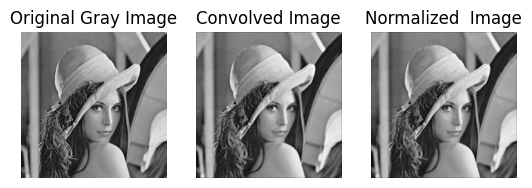

In [8]:
result = convolve(image_gray, gaussian_kernel)
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(result, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')
plt.subplot(1, 3, 3)
normalized_result = np.round(cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)).astype(np.uint8)
plt.imshow(normalized_result, cmap='gray')
plt.title('Normalized  Image')
plt.axis('off')
plt.show()
cv2.imshow('Convolved Image', normalized_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Defining Gaussian Smoothing and Sharpenning Filter Function

In [9]:
def Gaussian_Smoothing_Function(u,v,sigma):
    return (1/(2*np.pi*sigma**2))*np.exp(-(u**2 + v**2) /(sigma**2))

def Gaussian_Sharp_Function(u,v,sigma):
    return (((u**2 + v**2  - 2 * sigma**2)/sigma**4) * np.exp(-(u**2+v**2)/(2*sigma**2)))

def Gaussian_Smoothing_kernel(size , sigma):
    k = size // 2
    kernel = np.zeros((size,size ) , dtype=np.float32)
    for i in range(size):
        for j in range(size):
            u = i - k
            v = j - k 
            kernel[i,j] = Gaussian_Smoothing_Function(u,v,sigma)
    kernel /= np.sum(kernel)
    return kernel 
def Gaussian_Sharpenning_kernel(size , sigma):
    k = size // 2
    kernel = np.zeros((size,size ) , dtype=np.float32)
    for i in range(size):
        for j in range(size):
            u = i - k
            v = j - k 
            kernel[i,j] = Gaussian_Sharp_Function(u,v,sigma)
    kernel /= np.sum(kernel)
    return kernel 


Create Kernels 

In [16]:
smoothing_kernel = Gaussian_Smoothing_kernel(5, 1)
sharpening_kernel = Gaussian_Sharpenning_kernel(7, 1)
print("Smoothing Kernel:\n", smoothing_kernel)
print("Sharpening Kernel:\n", sharpening_kernel)

Smoothing Kernel:
 [[1.06788750e-04 2.14490923e-03 5.83046814e-03 2.14490923e-03
  1.06788750e-04]
 [2.14490923e-03 4.30816561e-02 1.17108084e-01 4.30816561e-02
  2.14490923e-03]
 [5.83046814e-03 1.17108084e-01 3.18332762e-01 1.17108084e-01
  5.83046814e-03]
 [2.14490923e-03 4.30816561e-02 1.17108084e-01 4.30816561e-02
  2.14490923e-03]
 [1.06788750e-04 2.14490923e-03 5.83046814e-03 2.14490923e-03
  1.06788750e-04]]
Sharpening Kernel:
 [[-3.8457531e-02 -3.2209969e-01 -1.0498551e+00 -1.5145537e+00
  -1.0498551e+00 -3.2209969e-01 -3.8457531e-02]
 [-3.2209969e-01 -2.1403515e+00 -4.7961950e+00 -5.2717257e+00
  -4.7961950e+00 -2.1403515e+00 -3.2209969e-01]
 [-1.0498551e+00 -4.7961950e+00 -0.0000000e+00  1.1813118e+01
  -0.0000000e+00 -4.7961950e+00 -1.0498551e+00]
 [-1.5145537e+00 -5.2717257e+00  1.1813118e+01  3.8953079e+01
   1.1813118e+01 -5.2717257e+00 -1.5145537e+00]
 [-1.0498551e+00 -4.7961950e+00 -0.0000000e+00  1.1813118e+01
  -0.0000000e+00 -4.7961950e+00 -1.0498551e+00]
 [-3.22099

Apply Kernel On the Grey Image

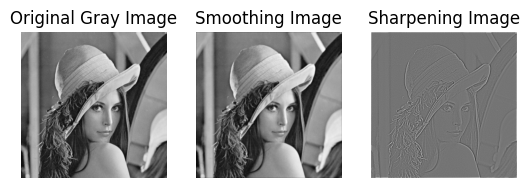

In [17]:
smooth_image = convolve(image_gray, smoothing_kernel)
sharp_image = convolve(image_gray, sharpening_kernel)
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(smooth_image, cmap='gray')
plt.title('Smoothing Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(sharp_image, cmap='gray')
plt.title('Sharpening Image')
plt.axis('off')
plt.show()

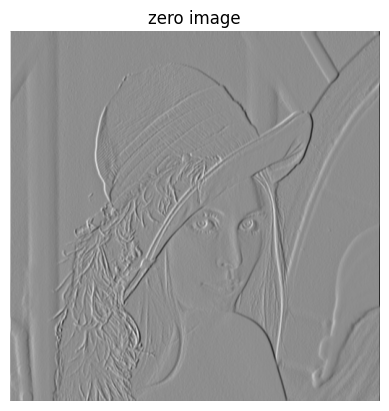

In [18]:
kernel_zero = np.array(
    [
        [1,0,-1],
        [1,0,-1],
        [1,0,-1]
    ]
)
zero_image = convolve(image_gray , kernel_zero)
plt.imshow(zero_image , cmap="gray")
plt.title("zero image")
plt.axis('off')
plt.show()